In [1]:
import sys
import math
import numpy as np
import scipy
import matplotlib.pyplot as plt

sys.path.append('..')
from src.probability import Distribution
from src.spectral_transforms import psi_real_to_circle, psi_inv_circle_to_real, B_real, B_circle
from src.numerical import trap_quad, fourier_quad
from src.plotting import plot_real_distribution, plot_circle_distribution, plot_circle_distribution_3D

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=8)
plt.rcParams.update({
    'font.size': 8,
    'text.usetex': True,
    'text.latex.preamble': r"\usepackage{amsfonts}" + "\n" + r"\usepackage{amsmath}" + "\n" + r"\usepackage{amssymb}"
})

### Draw Commutative Diagram from Real Line to Circle

In [ ]:
# Define lmbda on real line
quad_pts, quad_wts = trap_quad(-1, 3, 10000)
atoms = np.array([-0.8, 1, 2, 2.5])
atom_wts = 2*np.array([1.2, 1, 2, 0.8])
density = lambda x: (x+3 < 1) * (x+3 > -1)
density = lambda x: 2*np.exp(-10*(x-0.1)**2) * (np.abs(x) < 0.9)
#density = None
lmbda_real = Distribution(density, atoms, atom_wts, quad_pts, quad_wts, periodic_domain=None, full_support=False)
c0_real = 1
c1_real = 5

# Invert lmbda on real line to obtain mu on real line
mu_real, zeta0_real, zeta1_real = B_real(lmbda_real, c0_real, c1_real)
mu_real.update_quadrature(*trap_quad(-1.9, 3, 10000))

fig, axs = plt.subplots(1, 2, figsize=(6, 3))
plot_real_distribution(axs[0], lmbda_real, color="blue")
plot_real_distribution(axs[1], mu_real, color="red")
axs[0].set_title(f"$c_0$ = {c0_real:.3f}, $c_1$ = {c1_real:.3f}")
axs[1].set_title(f"$\zeta_0$ = {zeta0_real:.3f}, $\zeta_1$ = {zeta1_real:.3f}")
plt.show()



# Map (lmbda, c0) on real line to (lmbda, c0, c1) on circle
lmbda_circle, c0_circle = psi_real_to_circle(lmbda_real, c0_real, c1_real, len(quad_pts))

'''
# Map (lmbda, c0) on real line to (lmbda, c0, c1) on circle
mu2_circle, zeta02_circle = psi_real_to_circle(mu_real, zeta0_real, zeta1_real, 10)
fig, axs = plt.subplots(1, 1, figsize=(3, 3))
plot_circle_distribution(axs, mu2_circle, width = 2*np.pi, atom_scale = 1, density_scale = 1, color="red")
axs.set_title(f"$\zeta_0$ = {zeta02_circle:.3f}")
plt.show()
'''

# Invert lmbda on circle to obtain mu on circle
mu_circle, zeta0_circle = B_circle(lmbda_circle, c0_circle)

fig, axs = plt.subplots(1, 2, figsize=(6, 3))
plot_circle_distribution(axs[0], lmbda_circle, width = 2, color="blue")
plot_circle_distribution(axs[1], mu_circle, width = 2, color="red")
axs[0].set_title(f"$c_0$ = {c0_circle:.3f}")
axs[1].set_title(f"$\zeta_0$ = {zeta0_circle:.3f}")
plt.show()

fig = plt.figure(figsize=(6, 3))
ax0 = fig.add_subplot(1, 2, 1, projection='3d')
ax0.xaxis.pane.fill = False
ax0.yaxis.pane.fill = False
ax0.zaxis.pane.fill = False
ax0.view_init(azim=160, elev=30)
ax1 = fig.add_subplot(1, 2, 2, projection='3d')
ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False
ax1.view_init(azim=160, elev=30)
plot_circle_distribution_3D(ax0, lmbda_circle, width = 2, color="blue")
plot_circle_distribution_3D(ax1, mu_circle, width = 2, color="red")
ax0.set_title(f"$c_0$ = {c0_circle:.3f}")
ax1.set_title(f"$\zeta_0$ = {zeta0_circle:.3f}")
plt.show()

# Map lmbda on circle to real line and mu on circle to real line
lmbda_circle_to_real, c0_circle_to_real, c1_circle_to_real = psi_inv_circle_to_real(lmbda_circle, c0_circle, quad_pts, quad_wts)
mu_circle_to_real, zeta0_circle_to_real, zeta1_circle_to_real = psi_inv_circle_to_real(mu_circle, zeta0_circle, quad_pts, quad_wts)

fig, axs = plt.subplots(1, 2, figsize=(6, 3))
plot_real_distribution(axs[0], lmbda_circle_to_real, color="blue")
plot_real_distribution(axs[1], mu_circle_to_real, color="red")
axs[0].set_title(f"$c_0$ = {c0_circle_to_real:.3f}, $c_1$ = {c1_circle_to_real:.3f}")
axs[1].set_title(f"$\zeta_0$ = {zeta0_circle_to_real:.3f}, $\zeta_1$ = {zeta1_circle_to_real:.3f}")
plt.show()

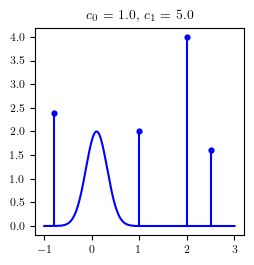

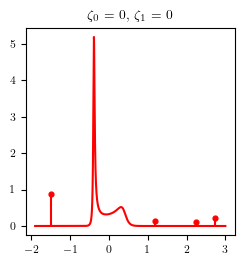

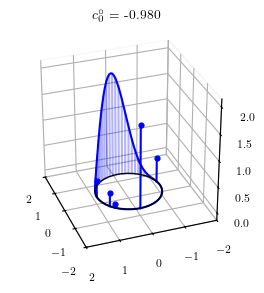

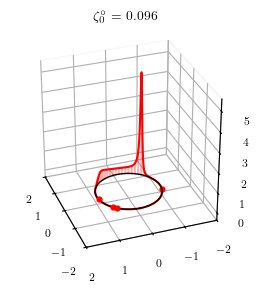

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(2.7, 2.7))
plot_real_distribution(ax, lmbda_real, color="blue", linewidth=1.5, s=12)
ax.set_title(f"$c_0$ = {c0_real:.1f}, $c_1$ = {c1_real:.1f}")
plt.savefig(f"../figures/lambda_real_comm.pdf", bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(2.7, 2.7))
plot_real_distribution(ax, mu_real, color="red", linewidth=1.5, s=12)
ax.set_title(f"$\zeta_0$ = {zeta0_real:.0f}, $\zeta_1$ = {zeta1_real:.0f}")
plt.savefig(f"../figures/mu_real_comm.pdf", bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.view_init(azim=160, elev=30)
xlim = ax.get_xlim3d()
ylim = ax.get_ylim3d()
zlim = ax.get_zlim3d()
plot_circle_distribution_3D(ax, lmbda_circle, width = 2, linewidth=1.5, s=12, color="blue")
ax.set_title(f"$c_0^\circ$ = {c0_circle:.3f}")
ax.set_box_aspect((1, 1, 1))
plt.savefig(f"../figures/lambda_circle_comm.pdf", bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.view_init(azim=160, elev=30)
plot_circle_distribution_3D(ax, mu_circle, width = 2, linewidth=1.5, s=12, color="red")
ax.set_title(f"$\zeta_0^\circ$ = {zeta0_circle:.3f}")
ax.set_box_aspect((1, 1, 1))
plt.savefig(f"../figures/mu_circle_comm.pdf", bbox_inches='tight')
plt.show()

### Test that $\mathcal{B}_\mathbb{R}$ is an involution on the real line

/Users/georgestepaniants/Research/time-deconvolution/hilbert_transform.py:169: RuntimeWarning: divide by zero encountered in divide
  self.H_disc = lambda x: 1/math.pi*np.sum(self.lmbda.atom_wts[None, :] / (x[:, None] - self.lmbda.atoms[None, :]), axis=1)


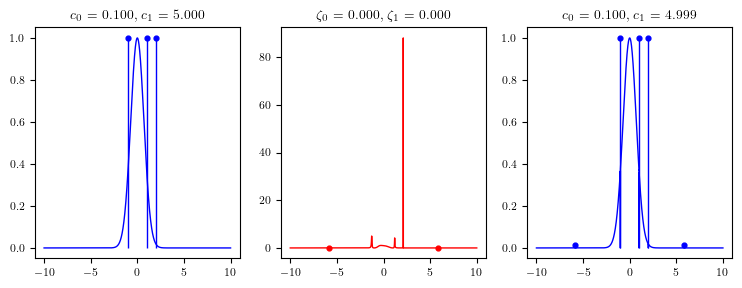

In [8]:
n = 100001
quad_pts, quad_wts = trap_quad(-10, 10, n)
density = lambda x: np.exp(-x**2) #np.ones_like(x)

lmbda_real = Distribution(density, np.array([-1, 1, 2]), np.array([1, 1, 1]), quad_pts, quad_wts)
c0_real = 0.1
c1_real = 5

mu_real, zeta0_real, zeta1_real = B_real(lmbda_real, c0_real, c1_real)

lmbda_real_hat, c0_real_hat, c1_real_hat = B_real(mu_real, zeta0_real, zeta1_real)

fig, axs = plt.subplots(1, 3, figsize=(9, 3))
plot_real_distribution(axs[0], lmbda_real, color="blue")
plot_real_distribution(axs[1], mu_real, color="red")
plot_real_distribution(axs[2], lmbda_real_hat, color="blue")
axs[0].set_title(f"$c_0$ = {c0_real:.3f}, $c_1$ = {c1_real:.3f}")
axs[1].set_title(f"$\zeta_0$ = {zeta0_real:.3f}, $\zeta_1$ = {zeta1_real:.3f}")
axs[2].set_title(f"$c_0$ = {c0_real_hat:.3f}, $c_1$ = {c1_real_hat:.3f}")
plt.show()

### Test that $\mathcal{B}$ is an involution on the circle

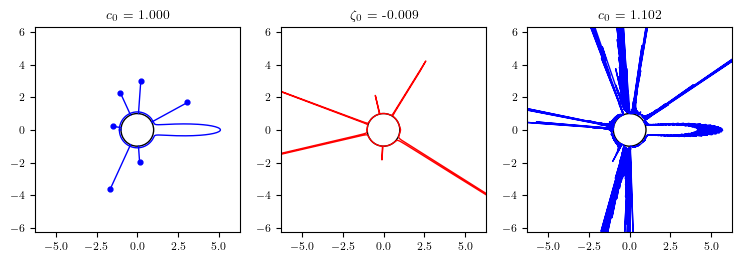

In [10]:
n = 1001
quad_pts, quad_wts = fourier_quad(-np.pi, np.pi, n)

sigma = 0.1
density = lambda theta: 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-theta**2/(2*sigma**2)) + 0.1
#density = lambda theta: np.exp(-theta**2)
#density = lambda theta: 1*(np.abs(theta) < 0.6)
#density = lambda theta: np.ones_like(theta)

atoms = np.array([])
atom_wts = np.array([])

atoms = np.array([-2, -1.5, 0.5, 1.5, 2, 3])
atom_wts = np.array([3, 1, 2.5, 2, 1.5, 0.5])

lmbda_circle = Distribution(density, atoms, atom_wts, quad_pts, quad_wts, periodic_domain=(-np.pi, np.pi))
c0_circle = 1
mu_circle, zeta0_circle = B_circle(lmbda_circle, c0_circle, thresh=1e-5)

lmbda_circle_hat, c0_circle_hat = B_circle(mu_circle, zeta0_circle)
new_pts = (quad_pts[1:] + quad_pts[:-1])/2
new_wts = quad_wts[1:]
lmbda_circle_hat.update_quadrature(new_pts, new_wts)

fig, axs = plt.subplots(1, 3, figsize=(9, 3))
plot_circle_distribution(axs[0], lmbda_circle, width = 2*np.pi, color="blue")
plot_circle_distribution(axs[1], mu_circle, width = 2*np.pi, color="red")
plot_circle_distribution(axs[2], lmbda_circle_hat, width = 2*np.pi, color="blue")
axs[0].set_title(f"$c_0$ = {c0_circle:.3f}")
axs[1].set_title(f"$\zeta_0$ = {zeta0_circle:.3f}")
axs[2].set_title(f"$c_0$ = {c0_circle_hat:.3f}")
plt.show()